In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
#sns.set_style('darkgrid', {'axes.facecolor': '.9'})
#sns.set_palette(palette='deep')
#sns_c = sns.color_palette(palette='deep')
%matplotlib inline

In [2]:
df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/nyiso/nyc_train_data_covid_42days_component.csv', parse_dates=['date'])

In [3]:
df.head()

,Unnamed: 0,date,total_load,daily_mean_temp,full_time_work_behavior_devices,completely_home_device_count,Restaurant_Recreaction,Retail,trans,LocalLinearTrend,Dynamic,full_time_coefficients,Restaurant_coefficients,Retail_coefficients
0,1,2019-01-01,119612.8,10.262500,9962,256262,250171,359409,609580,116678.821541,3099.317705,0.335991,-0.451418,0.313526
1,2,2019-01-02,136366.9,3.130417,31620,220643,356142,533493,889635,117798.936976,18333.920684,0.345988,-0.448981,0.313584
2,3,2019-01-03,136377.7,5.352917,33526,206784,375911,559887,935798,118234.240501,18268.450503,0.344584,-0.449009,0.313462
3,4,2019-01-04,136047.5,5.774583,33817,204272,410188,606285,1016473,118533.727042,17275.864520,0.347629,-0.451528,0.314590
4,5,2019-01-05,124706.6,6.647083,11594,255867,325100,477674,802774,118152.712819,6645.004746,0.346973,-0.453295,0.313997


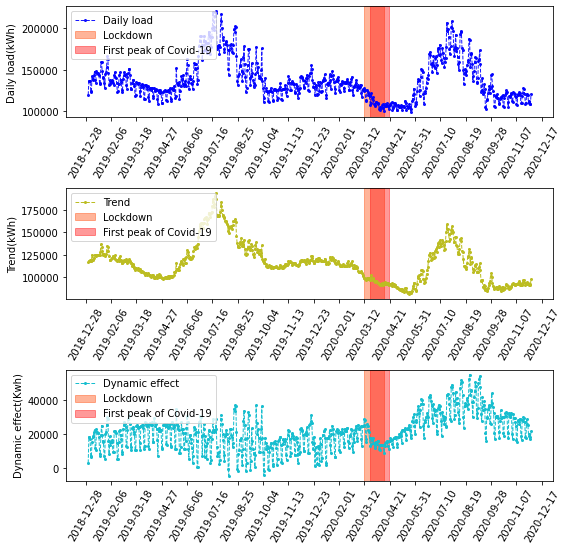

In [24]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]

fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(3, 1, 1)
ax.plot(df['date'], df['total_load'], lw=1, label="Daily load", c='blue',alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-20', '2020-04-20', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(3, 1, 2)
ax.plot(df['date'], df['LocalLinearTrend'], lw=1, label="Trend", c=c9,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-20', '2020-04-20', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Trend(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(3, 1, 3)
ax.plot(df['date'], df['Dynamic'], lw=1, label="Dynamic effect", c=c10,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-20', '2020-04-20', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Dynamic effect(Kwh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

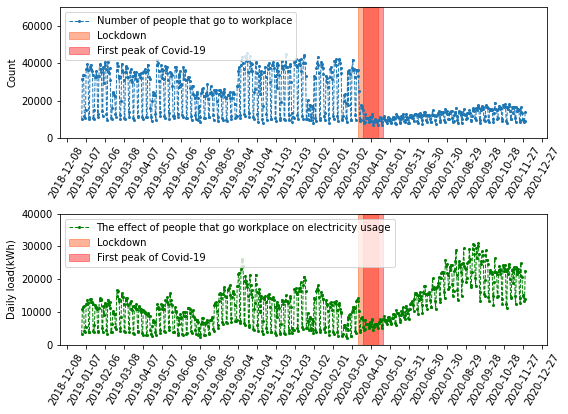

In [12]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['full_time_work_behavior_devices'], lw=1, label="Number of people that go to workplace", c=c1,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-20', '2020-04-20', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([0, 70000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['full_time_coefficients']*df['full_time_work_behavior_devices'], lw=1, label="The effect of people that go workplace on electricity usage", c='green',alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-20', '2020-04-20', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([0, 40000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

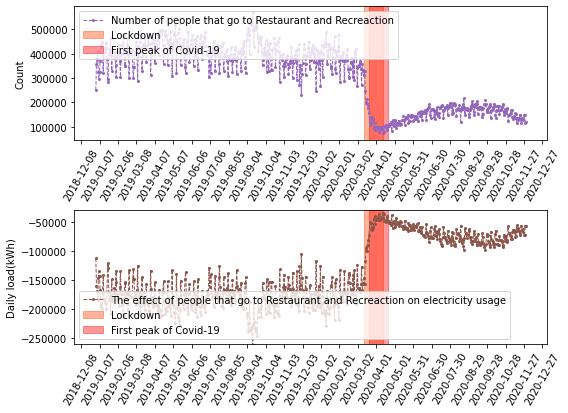

In [21]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Restaurant_Recreaction'], lw=1, label="Number of people that go to Restaurant and Recreaction", c=c5,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-20', '2020-04-20', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([10000, 500000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Restaurant_Recreaction']*df['Restaurant_coefficients'], lw=1, label="The effect of people that go to Restaurant and Recreaction on electricity usage", c=c6,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-20', '2020-04-20', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'lower left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-260000, -30000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

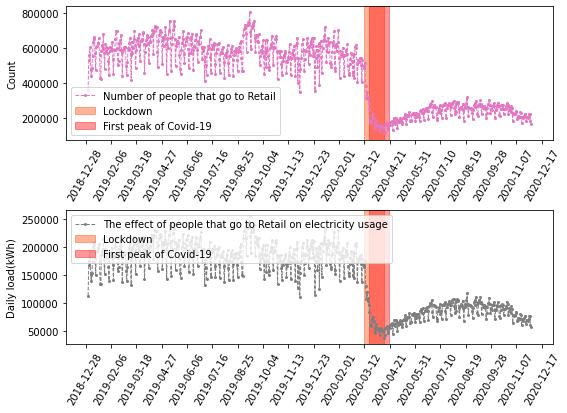

In [23]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Retail'], lw=1, label="Number of people that go to Retail", c=c7,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-20', '2020-04-20', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([1000, 50000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Retail']*df['Retail_coefficients'], lw=1, label="The effect of people that go to Retail on electricity usage", c=c8,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-20', '2020-04-20', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([-2000, 3000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()